# 14. Hausdorff Dimension

**Goal:** Compute fractal dimensions via box-counting.

The **box-counting dimension** approximates the Hausdorff dimension:
$$d = \lim_{\varepsilon \to 0} \frac{\log N(\varepsilon)}{\log(1/\varepsilon)}$$
where $N(\varepsilon)$ = minimum number of $\varepsilon$-boxes to cover the set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Fractals

In [2]:
def sierpinski(n_iter):
    points = np.array([[0,0]])
    vertices = np.array([[0,0],[1,0],[0.5, np.sqrt(3)/2]])
    for _ in range(n_iter * 10000):
        v = vertices[np.random.randint(3)]
        points = np.vstack([points, (points[-1] + v) / 2])
    return points[100:]  # skip transient

def koch_points(n_iter):
    def subdivide(p1, p2):
        d = p2 - p1
        a = p1 + d/3
        b = p1 + 2*d/3
        peak = (p1+p2)/2 + np.array([-d[1], d[0]]) * np.sqrt(3)/6
        return [(p1,a),(a,peak),(peak,b),(b,p2)]
    segments = [(np.array([0.,0.]), np.array([1.,0.]))]
    for _ in range(n_iter):
        new = []
        for p1,p2 in segments:
            new.extend(subdivide(p1,p2))
        segments = new
    pts = np.array([p for seg in segments for p in seg])
    return pts

def cantor_dust_2d(n_iter):
    points = []
    def recurse(x,y,size,depth):
        if depth == 0:
            points.append((x+size/2, y+size/2))
            return
        s = size/3
        for dx in [0, 2*s]:
            for dy in [0, 2*s]:
                recurse(x+dx, y+dy, s, depth-1)
    recurse(0, 0, 1, n_iter)
    return np.array(points)

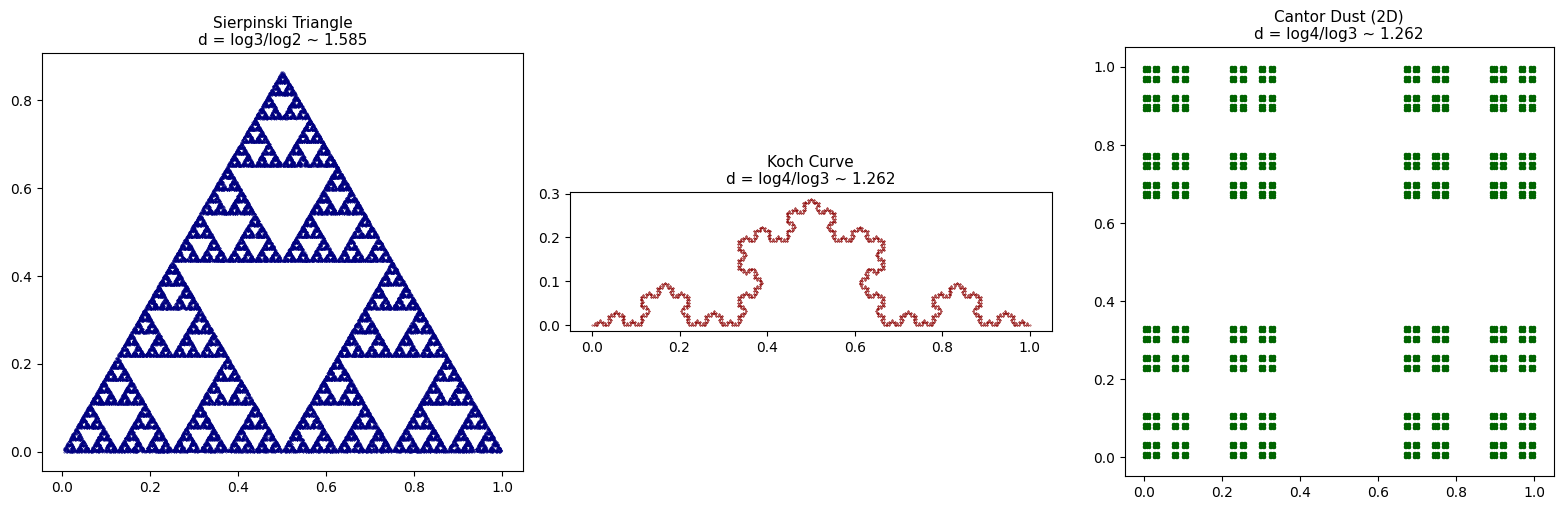

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

pts_s = sierpinski(5)
axes[0].scatter(pts_s[:,0], pts_s[:,1], s=0.1, c='navy')
axes[0].set_title('Sierpinski Triangle\nd = log3/log2 ~ 1.585', fontsize=11)
axes[0].set_aspect('equal')

pts_k = koch_points(5)
axes[1].scatter(pts_k[:,0], pts_k[:,1], s=0.1, c='darkred')
axes[1].set_title('Koch Curve\nd = log4/log3 ~ 1.262', fontsize=11)
axes[1].set_aspect('equal')

pts_c = cantor_dust_2d(6)
axes[2].scatter(pts_c[:,0], pts_c[:,1], s=2, c='darkgreen')
axes[2].set_title('Cantor Dust (2D)\nd = log4/log3 ~ 1.262', fontsize=11)
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show()

## Box-Counting Algorithm

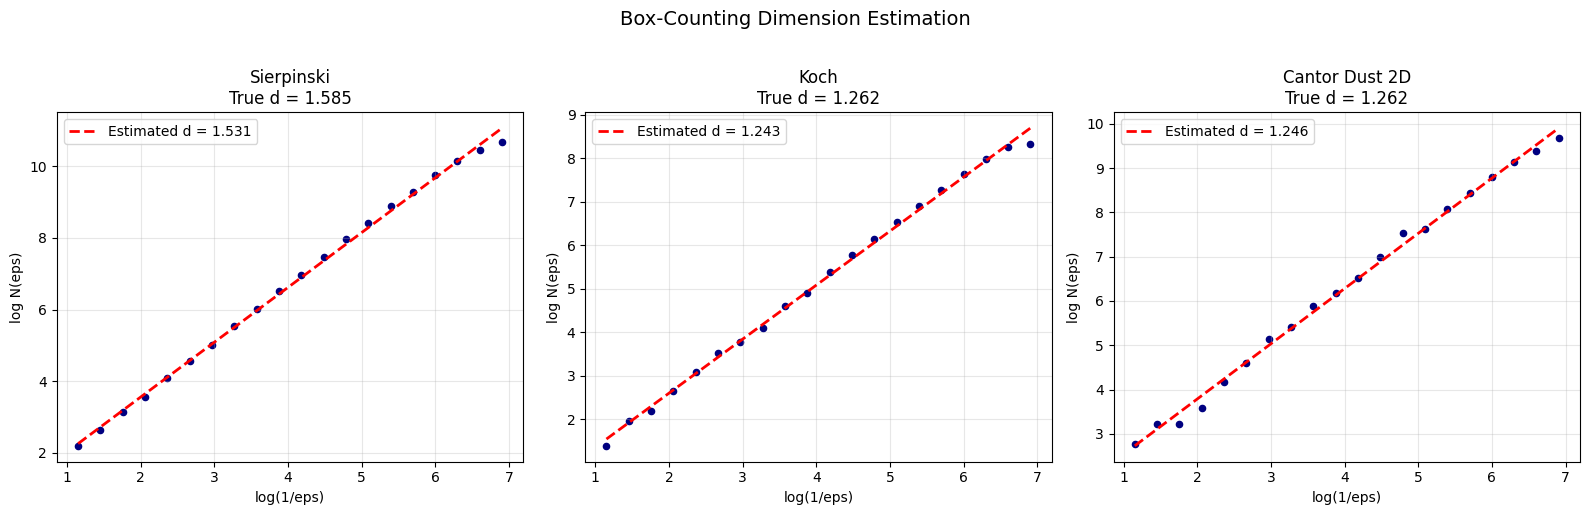

In [4]:
def box_count(points, epsilons):
    counts = []
    for eps in epsilons:
        grid = np.floor(points / eps).astype(int)
        unique_boxes = len(set(map(tuple, grid)))
        counts.append(unique_boxes)
    return np.array(counts)

epsilons = np.logspace(-0.5, -3, 20)

fractals = [
    ('Sierpinski', sierpinski(7), np.log(3)/np.log(2)),
    ('Koch', koch_points(6), np.log(4)/np.log(3)),
    ('Cantor Dust 2D', cantor_dust_2d(7), np.log(4)/np.log(3)),
]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for ax, (name, pts, true_d) in zip(axes, fractals):
    counts = box_count(pts, epsilons)
    log_eps = np.log(1/epsilons)
    log_N = np.log(counts)
    
    # Linear fit
    coeffs = np.polyfit(log_eps, log_N, 1)
    est_d = coeffs[0]
    
    ax.scatter(log_eps, log_N, c='navy', s=20)
    ax.plot(log_eps, np.polyval(coeffs, log_eps), 'r--', linewidth=2,
            label=f'Estimated d = {est_d:.3f}')
    ax.set_xlabel('log(1/eps)')
    ax.set_ylabel('log N(eps)')
    ax.set_title(f'{name}\nTrue d = {true_d:.3f}', fontsize=12)
    ax.legend(); ax.grid(True, alpha=0.3)
plt.suptitle('Box-Counting Dimension Estimation', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Hausdorff dimension** generalizes integer dimension to fractals.
2. **Box-counting** provides a practical numerical estimate.
3. Classical fractals have well-known dimensions (Sierpinski ~ 1.585, Koch ~ 1.262).
4. Non-integer dimension means the set is "between" dimensions in a precise measure-theoretic sense.